# –ü—Ä–æ–µ–∫—Ç QA

## Yes/No Questions

–í—ã –±—É–¥–µ—Ç–µ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–æ—Ä–ø—É—Å–æ–º BoolQ. –ö–æ—Ä–ø—É—Å —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –≤–æ–ø—Ä–æ—Å–æ–≤, –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—é—â–∏—Ö –±–∏–Ω–∞—Ä–Ω—ã–π –æ—Ç–≤–µ—Ç (–¥–∞ / –Ω–µ—Ç), –∞–±–∑–∞—Ü–µ–≤ –∏–∑ –í–∏–∫–∏–ø–µ–¥–∏–∏,  —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö –æ—Ç–≤–µ—Ç –Ω–∞ –≤–æ–ø—Ä–æ—Å, –∑–∞–≥–æ–ª–æ–≤–∫–∞ —Å—Ç–∞—Ç—å–∏, –∏–∑ –∫–æ—Ç–æ—Ä–æ–π –∏–∑–≤–ª–µ—á–µ–Ω –∞–±–∑–∞—Ü –∏ –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –æ—Ç–≤–µ—Ç–∞ (true / false).

–ö–æ—Ä–ø—É—Å –æ–ø–∏—Å–∞–Ω –≤ —Å—Ç–∞—Ç—å–µ:

Christopher Clark, Kenton Lee, Ming-Wei Chang, Tom Kwiatkowski, Michael Collins, Kristina Toutanova
BoolQ: Exploring the Surprising Difficulty of Natural Yes/No Questions

https://arxiv.org/abs/1905.10044


–ö–æ—Ä–ø—É—Å (train-dev split) –¥–æ—Å—Ç—É–ø–µ–Ω –≤ —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–∏ –ø—Ä–æ–µ–∫—Ç–∞:  https://github.com/google-research-datasets/boolean-questions

–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è train —á–∞—Å—Ç—å –∫–æ—Ä–ø—É—Å–∞, –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è ‚Äì dev —á–∞—Å—Ç—å. 

–ö–∞–∂–¥—ã–π –±–æ–Ω—É—Å –ø—É–Ω–∫—Ç –æ—Ü–µ–Ω–∏–≤–∞—Ç—Å—è –≤ 1 –±–∞–ª–ª. –í—ã–≤–æ–¥ —è–≤–ª—è—è–µ—Ç—Å—è –æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã–º!

In [1]:
!gsutil cp gs://boolq/train.jsonl .
!gsutil cp gs://boolq/dev.jsonl .

Copying gs://boolq/train.jsonl...
- [1 files][  6.2 MiB/  6.2 MiB]                                                
Operation completed over 1 objects/6.2 MiB.                                      
Copying gs://boolq/dev.jsonl...
- [1 files][  2.1 MiB/  2.1 MiB]                                                
Operation completed over 1 objects/2.1 MiB.                                      


### –ü—Ä–∏–º–µ—Ä –≤–æ–ø—Ä–æ—Å–∞: 
question: is batman and robin a sequel to batman forever

title: Batman & Robin (film)

answer: true

passage: With the box office success of Batman Forever in June 1995, Warner Bros. immediately commissioned a sequel. They hired director Joel Schumacher and writer Akiva Goldsman to reprise their duties the following August, and decided it was best to fast track production for a June 1997 target release date, which is a break from the usual 3-year gap between films. Schumacher wanted to homage both the broad camp style of the 1960s television series and the work of Dick Sprang. The storyline of Batman & Robin was conceived by Schumacher and Goldsman during pre-production on A Time to Kill. Portions of Mr. Freeze's back-story were based on the Batman: The Animated Series episode ''Heart of Ice'', written by Paul Dini.

## –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

–°—á–∏—Ç—ã–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö.

In [2]:
import json
import pandas as pd

with open('train.jsonl', 'r') as json_file:
    train_list = list(json_file)

with open('dev.jsonl', 'r') as json_file:
    dev_list = list(json_file)

train_df = pd.DataFrame([json.loads(jline) for jline in train_list])
dev_df = pd.DataFrame([json.loads(jline) for jline in dev_list])
df = pd.DataFrame([json.loads(jline) for jline in train_list + dev_list])
df.head()

question  \
0    do iran and afghanistan speak the same language   
1  do good samaritan laws protect those who help ...   
2  is windows movie maker part of windows essentials   
3  is confectionary sugar the same as powdered sugar   
4         is elder scrolls online the same as skyrim   

                      title  answer  \
0          Persian language    True   
1        Good Samaritan law    True   
2       Windows Movie Maker    True   
3            Powdered sugar    True   
4  The Elder Scrolls Online   False   

                                             passage  
0  Persian (/Ààp…úÀêr í…ôn, - É…ôn/), also known by its ...  
1  Good Samaritan laws offer legal protection to ...  
2  Windows Movie Maker (formerly known as Windows...  
3  Powdered sugar, also called confectioners' sug...  
4  As with other games in The Elder Scrolls serie...

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ñ—Ä–µ–π–º–≤–æ—Ä–∫–∞ –¥–ª—è –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–∞.

In [3]:
import string, re, nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()

def preproc_nltk(text):
    text = re.sub(f'[{string.punctuation}]', ' ', text)
    return ' '.join([wnl.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stopWords])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


–ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–∞.

In [4]:
train_df['nltk_question'] = train_df['question'].apply(preproc_nltk)
dev_df['nltk_question'] = train_df['question'].apply(preproc_nltk)
df['nltk_question'] = train_df['question'].apply(preproc_nltk)

train_df['nltk_passage'] = train_df['passage'].apply(preproc_nltk)
dev_df['nltk_passage'] = train_df['passage'].apply(preproc_nltk)
df['nltk_passage'] = train_df['passage'].apply(preproc_nltk)


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª–µ–π–±–ª–æ–≤ –ø–æ—á—Ç–∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∫–∞–∫ –≤ train —á–∞—Å—Ç–∏, —Ç–∞–∫ –∏ –≤ dev.

In [5]:
display(df.answer.value_counts(normalize=True))
display(train_df.answer.value_counts(normalize=True))
display(dev_df.answer.value_counts(normalize=True))

True     0.622746
False    0.377254
Name: answer, dtype: float64

True     0.623104
False    0.376896
Name: answer, dtype: float64

True     0.621713
False    0.378287
Name: answer, dtype: float64

–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –≤–æ–ø—Ä–æ—Å–µ –ø–æ—á—Ç–∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ –∫–∞–∫ –¥–æ, —Ç–∞–∫ –∏ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏.

In [6]:
print(round(df.question.str.split().str.len().mean(), 1))
print(round(train_df.question.str.split().str.len().mean(), 1))
print(round(dev_df.question.str.split().str.len().mean(), 1))

8.8
8.8
8.7


In [7]:
print(round(df.nltk_question.str.split().str.len().mean(), 1))
print(round(train_df.nltk_question.str.split().str.len().mean(), 1))
print(round(dev_df.nltk_question.str.split().str.len().mean(), 1))

4.6
4.6
4.6


–ù–∞ train —á–∞—Å—Ç–∏ –≤–æ–ø—Ä–æ—Å—ã –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–ª–∏–Ω–Ω–µ–µ –Ω–∞ 1 —Å–ª–æ–≤–æ, –Ω–æ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–ª–∏–Ω–∞ –ø–æ—á—Ç–∏ –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è.

In [8]:
print(round(df.passage.str.split().str.len().mean(), 1))
print(round(train_df.passage.str.split().str.len().mean(), 1))
print(round(dev_df.passage.str.split().str.len().mean(), 1))

92.9
93.2
92.2


In [9]:
print(round(df.nltk_passage.str.split().str.len().mean(), 1))
print(round(train_df.nltk_passage.str.split().str.len().mean(), 1))
print(round(dev_df.nltk_passage.str.split().str.len().mean(), 1))

56.8
56.8
56.6


*Queries that are likely to be yes/no questions are heuristically identified: we found selecting queries where the first word is in a manually constructed set of indicator words and are of sufficient length, to be effective.*

*The full set is: {‚Äúdid‚Äù, ‚Äúdo‚Äù, ‚Äúdoes‚Äù, ‚Äúis‚Äù, ‚Äúare‚Äù, ‚Äúwas‚Äù, ‚Äúwere‚Äù, ‚Äúhave‚Äù, ‚Äúhas‚Äù, ‚Äúcan‚Äù, ‚Äúcould‚Äù, ‚Äúwill‚Äù, ‚Äúwould‚Äù}.*

*... use questions that were marked as having a yes/no answer, and pair each question with the selected passage instead of the entire document.*


–í—Å–µ –≤–æ–ø—Ä–æ—Å—ã –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è —Å –æ–¥–Ω–æ–≥–æ –∏–∑ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –º–∞—Ä–∫–µ—Ä–æ–≤ –≤ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω–æ–º —Å–ø–∏—Å–∫–µ. –ò–∑-–∑–∞ —ç—Ç–æ–≥–æ —É –≤–æ–ø—Ä–æ—Å–æ–≤ –±—É–¥–µ—Ç –∑–∞—Ä–∞–Ω–µ–µ –∑–∞–¥–∞–Ω–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞, –ø–æ–¥ –∫–æ—Ç–æ—Ä—É—é –º–æ–∂–µ—Ç –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞—Ç—å—Å—è –º–æ–¥–µ–ª—å. –í–ø–æ–ª–Ω–µ –≤–æ–∑–º–æ–∂–Ω–æ, –ø–æ—ç—Ç–æ–º—É –≤ —Ç–µ–∫—Å—Ç–µ –±—É–¥—É—Ç –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –ø—Ä—è–º—ã–µ –≤–æ–ø—Ä–æ—Å—ã –≤ —Ñ–æ—Ä–º–∞–ª—å–Ω–æ–º —Å—Ç–∏–ª–µ, –∑–∞–¥–∞—é—â–∏–µ –≤–æ–ø—Ä–æ—Å –ø—Ä–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π –≤–æ–ø—Ä–æ—Å. –ù–µ –±—É–¥–µ—Ç –Ω–µ—Ñ–æ—Ä–º–∞–ª—å–Ω—ã—Ö –≤–æ–ø—Ä–æ—Å–æ–≤ —Å–æ —Å–≤–æ–±–æ–¥–Ω–æ–º –ø–æ—Ä—è–¥–∫–æ–º –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è, tag questions, –≤–æ–ø—Ä–æ—Å–æ–≤ —Å –æ—Ç—Ä–∏—Ü–∞–Ω–∏–µ–º –∏–ª–∏ —Ñ–∞–∫—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏—Ç—å –∏–ª–∏ –æ–ø—Ä–æ–≤–µ—Ä–≥–Ω—É—Ç—å.

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø–∞—Å—Å–∞–∂–∞ –±—Ä–∞–ª–∞—Å—å —Ç–∞ —á–∞—Å—Ç—å —Ç–µ–∫—Å—Ç–∞, –≤ –∫–æ—Ç–æ—Ä–æ–π —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –æ—Ç–≤–µ—Ç –Ω–∞ –≤–æ–ø—Ä–æ—Å. –¢–æ –µ—Å—Ç—å, –º–æ–¥–µ–ª–∏ –±—É–¥–µ—Ç –Ω–∞–º–Ω–æ–≥–æ –ø—Ä–æ—â–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∫–ª—é—á–µ–≤—ã–µ –º–æ–º–µ–Ω—Ç—ã —Ç–µ–∫—Å—Ç–∞.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–µ—Ä–≤—ã–µ —Å–ª–æ–≤–∞ –≤–æ–ø—Ä–æ—Å–æ–≤. –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–ª–æ–≤–∞ - —Ç–µ, —á—Ç–æ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –≤ —Å–ø–∏—Å–∫–µ –≤—ã—à–µ –∏ –≤—ã–±—Ä–∞–Ω—ã –∞–≤—Ç–æ—Ä–∞–º–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞.

In [10]:
df.question.str.split().str[0].value_counts().head(30)

is           5722
can          1530
does         1325
are           944
do            907
did           595
was           439
has           426
will          249
have           95
the            91
were           42
in             35
if             17
a              16
what           11
could          11
when           10
would           6
where           5
who             5
an              4
why             3
true            3
my              3
should          2
according       2
by              2
nilgiri         2
didn't          2
Name: question, dtype: int64

–ï—Å–ª–∏ –º—ã –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è —Å –¥—Ä—É–≥–∏—Ö —Å–ª–æ–≤, —Ç–æ –º—ã —É–≤–∏–¥–∏–º, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–∫–∏ —á–∞—Å—Ç–∏ —Ñ—Ä–∞–∑—ã —è–≤–ª—è—é—Ç—Å—è —Ä–æ–≤–Ω–æ —Ç–µ–º–∏ –∂–µ –≤–æ–ø—Ä–æ—Å–∞–º–∏ —Å –Ω—É–∂–Ω—ã–º –ø–µ—Ä–≤—ã–º —Å–ª–æ–≤–æ–º (–∞ —Ç–∞–∫ –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è —Å —É–∫–∞–∑–∞–Ω–∏—è –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞), –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π —É—Å–µ—á–µ–Ω–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ auxiliary verb (–≥–ª–∞–≥–æ–ª–∞ –∏–∑ —Å–ø–∏—Å–∫–∞) —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –≤–æ–ø—Ä–æ—Å–∞–º–∏ –Ω—É–∂–Ω–æ–π —Ñ–æ—Ä–º—ã. –•–æ—Ç—è –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ, —ç—Ç–∏ –≤–æ–ø—Ä–æ—Å—ã –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂–∏ –Ω–∞ —Ñ–∞–∫—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –¥–æ–∫–∞–∑–∞—Ç—å –∏–ª–∏ –æ–ø—Ä–æ–≤–µ—Ä–≥–Ω—É—Ç—å. –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –≤–æ–ø—Ä–æ—Å—ã —Å–æ–¥–µ—Ä–∂–∞—Ç –≤ —Å–≤–æ–µ–º —Ç–µ–∫—Å—Ç–µ —Å–æ—á–µ—Ç–∞–Ω–∏–µ "true or false", —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —Ñ–∞–∫—Ç–∞, –∫–æ—Ç–æ—Ä–æ–º—É –Ω—É–∂–Ω–æ –≤—ã–¥–∞—Ç—å –≤–µ—Ä–¥–∏–∫—Ç.

–¢–∞–∫–∂–µ –≤—Å—Ç—Ä–µ—Ç–∏–ª–∏—Å—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –≤–æ–ø—Ä–æ—Å—ã —Å –æ—Ç—Ä–∏—Ü–∞–Ω–∏–µ–º.

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –µ—Å—Ç—å –≤–æ–ø—Ä–æ—Å—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞—é—Ç –æ—Ç–≤–µ—Ç –¥–∞/–Ω–µ—Ç, –Ω–∞–ø—Ä–∏–º–µ—Ä, "who does denzel washington play in remember the titans".

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –∑–∞–ø—Ä–æ—Å—ã —Å–∞–º–æ–≥–æ —Ä–∞–∑–ª–∏—á–Ω–æ–≥–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∞, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —É–∫–∞–∑–∞–Ω–Ω–æ–π –≤ —Å—Ç–∞—Ç—å–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ. –û–Ω–∏ –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–º–∏, –Ω–æ –ø–ª–æ—Ö–æ —Å—Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏, –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–µ—Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–º–∏. –¢–∞–∫–∞—è —Ä–∞–∑–Ω–æ–ø–ª–∞–Ω–æ–≤–æ—Å—Ç—å –∫–æ—Ä–ø—É—Å–∞ –≤–æ–∑–º–æ–∂–Ω–æ –º–æ–∂–µ—Ç –ø—Ä–∏–≤–æ–¥–∏—Ç—å –º–æ–¥–µ–ª–∏ –≤ –∑–∞–º–µ—à–∞—Ç–µ–ª—å—Å—Ç–≤–æ, —Ç–∞–∫ –∫–∞–∫ –µ–π –±—É–¥–µ—Ç —Ç—è–∂–µ–ª–æ –≤—ã—á–ª–µ–Ω–∏—Ç—å –Ω—É–∂–Ω—É—é —Å–µ–º–∞–Ω—Ç–∏–∫—É –∏–∑ –≤–æ–ø—Ä–æ—Å–∞, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∞ –Ω–µ –º–æ–∂–µ—Ç –¥–æ–≥–∞–¥–∞—Ç—å—Å—è, –≤ –∫–∞–∫–æ–π —Ñ–æ—Ä–º–µ –≤–æ–ø—Ä–æ—Å –ø—Ä–∏–¥–µ—Ç. –≠—Ç–æ –º–æ–∂–µ—Ç —Å–∏–ª—å–Ω–æ —É—Å–ª–æ–∂–Ω–∏—Ç—å –ø—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –µ—Å–ª–∏ –æ–±—É—á–∞—Ç—å –µ–µ –Ω–∞ "–ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö" –∑–∞–ø—Ä–æ—Å–∞—Ö, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø–∏—Å–∞–Ω—ã –≤ —Å—Ç–∞—Ç—å–µ, —Ç–æ –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç –ø–ª–æ—Ö–æ –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å —Å–µ–±—è –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, —Ç–∞–∫ –∫–∞–∫ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –≤–æ–ø—Ä–æ—Å—ã –º–æ–≥—É—Ç –±—ã—Ç—å —Ç–∞–∫–∏–º–∏ –∂–µ —Å—É–º–±—É—Ä–Ω—ã–º–∏ –∏ —Å–ª—É—á–∞–π–Ω—ã–º –∫–∞–∫ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ, –ø–æ—ç—Ç–æ–º—É –∏—Ö —É–¥–∞–ª–µ–Ω–∏–µ –Ω–µ –ø–æ–º–æ–∂–µ—Ç.

In [11]:
df.question[~df.question.str.split().str[0] \
                  .isin(["did", "do", "does", "is", "are", "was", "were", 
                         "have", "has", "can", "could", "will", "would"])].tolist()

['calcium carbide cac2 is the raw material for the production of acetylene',
 'the boy in the plastic bubble based on true story',
 'science begins with the premise that knowledge should first be acquired through observation',
 'in the phantom menace is padme the queen',
 'you can tell a lot about a person by how they treat their waiter',
 'several cranial nerves innervate structures of the tongue',
 'the movie rudy based on a true story',
 'the former soviet union broke into separate states',
 'paths from the cerebral cortex to the spinal cord are called the corticospinal tracts',
 'true or false anaphylaxis generally only affects the skin and eyes',
 'when sandy hit nj was it a hurricane',
 'during his lifetime an athenian citizen could serve on the council of five hundred',
 'the visual cliff is a device for studying',
 'the long road home is it a series',
 'if a table contains a primary key there can be no duplicate records in a table',
 'the main component of stomach acid is sulfu

## –ü–æ–¥—Ö–æ–¥—ã 1-2. –ö–æ–Ω—Å—Ç–∞–Ω—Ç–∞ –∏ fasttext

In [12]:
from sklearn.metrics import accuracy_score

In [28]:
val_df = train_df.sample(frac=0.2, random_state=10)
train_df = train_df[~train_df.index.isin(val_df.index)]

In [ ]:
y_pred = [train_df.answer.value_counts().index[0]] * len(dev_df)

print(round(accuracy_score(y_pred, dev_df.answer.values) * 100, 2))

62.17


fasttext

In [ ]:
# import gensim
# import gensim.downloader as api

# fasttext = api.load("fasttext-wiki-news-subwords-300")

In [ ]:
!pip install fasttext

import fasttext

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 71kB 5.4MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3096663 sha256=4438969f5fe99a5117c3f6f0e874f50a89892d64c494e55c01c7a6491c4be12b
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
train_df['concat_question_passage'] = train_df.question + ' ' + train_df.passage
val_df['concat_question_passage'] = val_df.question + ' ' + val_df.passage
dev_df['concat_question_passage'] = dev_df.question + ' ' + dev_df.passage

In [ ]:
train_df['fasttext_label'] = '__label__' + train_df.answer.astype(str)
val_df['fasttext_label'] = '__label__' + val_df.answer.astype(str)
dev_df['fasttext_label'] = '__label__' + dev_df.answer.astype(str)

In [ ]:
train_df[['fasttext_label', 'concat_question_passage']] \
          .to_csv('fasttext_train.txt', index=False, sep=' ', header=False)
val_df[['fasttext_label', 'concat_question_passage']] \
          .to_csv('fasttext_val.txt', index=False, sep=' ', header=False)
dev_df[['fasttext_label', 'concat_question_passage']] \
          .to_csv('fasttext_dev.txt', index=False, sep=' ', header=False)

–ü–æ–∏–≥—Ä–∞—é—Å—å —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ fasttext.

In [ ]:
fasttext_model = fasttext.train_supervised('fasttext_train.txt',
                                  epoch = 10, wordNgrams = 3, dim=100,
                                  autotuneValidationFile='fasttext_val.txt')

y_pred = fasttext_model.predict(dev_df['concat_question_passage'].tolist())
bool_dict = {'True': True, 'False': False}

y_pred = [bool_dict[pred[0].split('__')[-1]] for pred in y_pred[0]]
print(round(accuracy_score(y_pred, dev_df.answer.values) * 100, 2))

67.83


In [ ]:
fasttext_model = fasttext.train_supervised('fasttext_train.txt',
                                  epoch = 10, wordNgrams = 3, dim=50,
                                  autotuneValidationFile='fasttext_val.txt')

y_pred = fasttext_model.predict(dev_df['concat_question_passage'].tolist())
bool_dict = {'True': True, 'False': False}

y_pred = [bool_dict[pred[0].split('__')[-1]] for pred in y_pred[0]]
print(round(accuracy_score(y_pred, dev_df.answer.values) * 100, 2))

68.29


In [ ]:
fasttext_model = fasttext.train_supervised('fasttext_train.txt',
                                  epoch = 10, wordNgrams = 5, dim=100,
                                  autotuneValidationFile='fasttext_val.txt')

y_pred = fasttext_model.predict(dev_df['concat_question_passage'].tolist())
bool_dict = {'True': True, 'False': False}

y_pred = [bool_dict[pred[0].split('__')[-1]] for pred in y_pred[0]]
print(round(accuracy_score(y_pred, dev_df.answer.values) * 100, 2))

68.47


In [ ]:
fasttext_model = fasttext.train_supervised('fasttext_train.txt',
                                  epoch = 20, wordNgrams = 5, dim=100,
                                  autotuneValidationFile='fasttext_val.txt')

y_pred = fasttext_model.predict(dev_df['concat_question_passage'].tolist())
bool_dict = {'True': True, 'False': False}

y_pred = [bool_dict[pred[0].split('__')[-1]] for pred in y_pred[0]]
print(round(accuracy_score(y_pred, dev_df.answer.values) * 100, 2))

67.95


In [ ]:
fasttext_model = fasttext.train_supervised('fasttext_train.txt', lr=0.7,
                                  epoch = 10, wordNgrams = 5, dim=100,
                                  autotuneValidationFile='fasttext_val.txt')

y_pred = fasttext_model.predict(dev_df['concat_question_passage'].tolist())
bool_dict = {'True': True, 'False': False}

y_pred = [bool_dict[pred[0].split('__')[-1]] for pred in y_pred[0]]
print(round(accuracy_score(y_pred, dev_df.answer.values) * 100, 2))

68.38


–õ—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∏ –±–æ–ª—å—à–µ–º learning rate, –º–µ–Ω—å—à–µ–º —Ä–∞–∑–º–µ—Ä–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –∏ –±–æ–ª—å—à–µ–º —á–∏—Å–ª–µ —ç–ø–æ—Ö. –ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ 68-68.5%, —á—Ç–æ –≤—Å–µ–≥–æ –Ω–∞ 6% –ª—É—á—à–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã.

FastText —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è –ø–ª–æ—Ö–æ, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –Ω–µ —Ä–∞–∑–ª–∏—á–∞–µ—Ç –≤–æ–ø—Ä–æ—Å –∏ –ø–∞—Å—Å–∞–∂, –ø–æ—ç—Ç–æ–º—É –Ω–µ –≤—Å–µ–≥–¥–∞ –º–æ–∂–µ—Ç –ø–æ–Ω–∏–º–∞—Ç—å, —á—Ç–æ –Ω—É–∂–Ω–æ –∏—Å–∫–∞—Ç—å —Å–≤—è–∑—å –º–µ–∂–¥—É —Å–ª–æ–≤–∞–º–∏ –≤ –≤–æ–ø—Ä–æ—Å–µ –∏ –≤ –ø–∞—Å—Å–∞–∂–µ.–ú–æ–¥–µ–ª—å –≤–æ—Å–ø—Ä–∏–Ω–∏–º–∞–µ—Ç –≤—Å–µ –∫–∞–∫ –æ–¥–∏–Ω —Ç–µ–∫—Å—Ç, –∫–æ–≥–¥–∞ –≤–æ–ø—Ä–æ—Å –∏ –ø–∞—Å—Å–∞–∂ —Å—Ç–æ–∏–ª–æ –±—ã –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –æ—Ç–¥–µ–ª—å–Ω–æ, —á—Ç–æ–±—ã –≤—ã–¥–µ–ª—è—Ç—å –∏—Ö –æ—Ç–¥–µ–ª—å–Ω—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, —Ç–∞–∫ –∫–∞–∫ –æ–Ω —Å–º–æ—Ç—Ä–∏—Ç –Ω–∞ –º–æ—Ä—Ñ–µ–º—ã, —Ç–æ –æ–Ω –º–æ–∂–µ—Ç —Ç–µ—Ä—è—Ç—å –º–æ–≥ –≤–µ—Ä—Ö–Ω–µ—É—Ä–æ–≤–Ω–µ–≤–æ–π –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –Ω—É–∂–Ω–∞ –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –Ω—É–∂–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –≤ –≤–æ–ø—Ä–æ—Å–µ.

## –ß–∞—Å—Ç—å 3. –ò—Å–ø–æ–ª—å–∑—É–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π (2 –±–∞–ª–ª–∞)
1. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ BERT —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –≤–æ–ø—Ä–æ—Å–∞ –∏ –∞–±–∑–∞—Ü–∞. –û–±—É—á–∏—Ç–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ –∫–æ–Ω–∫–∞—Ç–µ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–∞—Ö –≤–æ–ø—Ä–æ—Å–∞ –∏ –∞–±–∑–∞—Ü–∞ –∏ –æ—Ü–µ–Ω–∏—Ç–µ accuracy —ç—Ç–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è. 

[bonus] –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, –¥–æ—Å—Ç—É–ø–Ω—ã–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ ü§ó Transformers. –ö–∞–∫–∞—è –º–æ–¥–µ–ª—å —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥–∞—Å—Ç –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã?

[bonus] –ü—Ä–µ–¥–ª–æ–∂–∏—Ç–µ –º–µ—Ç–æ–¥ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö –∏ –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–π—Ç–µ –µ–≥–æ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å. 

In [13]:
import torch
!pip install transformers
from transformers import BertTokenizer, BertModel, \
                         DistilBertTokenizer, DistilBertModel, \
                         BertForQuestionAnswering, \
                         RobertaTokenizer, RobertaModel,\
                         LongformerTokenizer, LongformerModel
from sklearn.linear_model import LogisticRegression
import numpy as np
import gc
import tqdm

import warnings
warnings.filterwarnings("ignore")

import logging
logging.disable(logging.WARNING)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.0/7.0 MB 87.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 101.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 200.1/200.1 kB 25.0 MB/s eta 0:00:00


In [14]:
import tqdm
from IPython.display import clear_output
def get_emb(text_series, tokenizer, model, batch_size=32,
            truncation='longest_first',
            padding='max_length',
            max_length=512):

  text_series_padded = [tokenizer.encode(x,
                      add_special_tokens=True,
                      padding=padding,
                      truncation=truncation,
                      max_length=max_length) for x in text_series]
  
  text_series_padded = np.array(text_series_padded, dtype=np.int64)
  attention_mask = np.where(text_series_padded != 0, 1, 0)

  model.eval()

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)

  output = []

  for idx in tqdm.tqdm(range(0, len(text_series_padded), batch_size)):

    batch = torch.tensor(text_series_padded[idx:idx + batch_size]).to(device)
    part_mask = torch.tensor(attention_mask[idx:idx + batch_size]).to(device)

    with torch.no_grad():
        release = model(batch, attention_mask=part_mask)
        output.append(release.last_hidden_state[:, 0, :].cpu())
    
    del release, batch, part_mask
    torch.cuda.empty_cache()

  return torch.cat(output, dim=0)

In [15]:
def get_accuracy(pretrained_weights, tokenizer, model, nltk=True,
                 truncation='longest_first',
                 padding='max_length',
                 max_length=512):

    tokenizer = tokenizer.from_pretrained(pretrained_weights)
    model = model.from_pretrained(pretrained_weights)

    if nltk:
    
        train_question_emb = get_emb(train_df.nltk_question, tokenizer, model, 
                                     batch_size=64)
        train_passage_emb = get_emb(train_df.nltk_passage, tokenizer, model, 
                                    batch_size=32, truncation=truncation,
                                     padding=padding, max_length=max_length)
        
    else:

        train_question_emb = get_emb(train_df.question, tokenizer, model, 
                                     batch_size=64)
        train_passage_emb = get_emb(train_df.passage, tokenizer, model, 
                                    batch_size=32, truncation=truncation,
                                     padding=padding, max_length=max_length)
        
    train_total_emb = torch.cat([train_question_emb, 
                                 train_passage_emb], dim=1).cpu().numpy()

    logreg = LogisticRegression()
    logreg.fit(train_total_emb, train_df.answer)

    del train_question_emb, train_passage_emb, train_total_emb
    gc.collect()

    if nltk:

        dev_question_emb = get_emb(dev_df.nltk_question, tokenizer, model,
                                   batch_size=64)
        dev_passage_emb = get_emb(dev_df.nltk_passage, tokenizer, model,
                                  batch_size=32, truncation=truncation,
                                     padding=padding, max_length=max_length)

    else:

        dev_question_emb = get_emb(dev_df.question, tokenizer, model,
                                   batch_size=64)
        dev_passage_emb = get_emb(dev_df.passage, tokenizer, model,
                                  batch_size=32, truncation=truncation,
                                     padding=padding, max_length=max_length)
    
    dev_total_emb = torch.cat([dev_question_emb, 
                               dev_passage_emb], dim=1).cpu().numpy()

    y_pred = logreg.predict(dev_total_emb)
    ans = round(accuracy_score(y_pred, dev_df.answer.values) * 100, 2)

    del dev_question_emb, dev_passage_emb, dev_total_emb
    gc.collect()

    clear_output()

    return ans

–°–Ω–∞—á–∞–ª–∞ —è –ø–æ–ø—Ä–æ–±—É—é –ø—Ä–∏–º–µ–Ω—è—Ç—å DistilBert, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –Ω–µ–±–æ–ª—å—à–æ–π, –±—ã—Å—Ç—Ä—ã–π –∏ –ø–æ—á—Ç–∏ –Ω–∞—Å—Ç–æ–ª—å–∫–æ –∂–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π –∫–∞–∫ –æ–±—ã—á–Ω—ã–π Bert. –Ø –ø–æ—Å–º–æ—Ç—Ä—é –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –¥–ª—è –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –∏ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤.

In [ ]:
get_accuracy('distilbert-base-uncased', DistilBertTokenizer, DistilBertModel)

54.13

In [ ]:
get_accuracy('distilbert-base-uncased', DistilBertTokenizer, DistilBertModel,
             nltk=False)

65.54

–í–∏–¥–Ω–æ, —á—Ç–æ DistilBert –Ω–∞ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–µ (–Ω–∞ 11%) –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–µ–±—è, —á–µ–º –Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö. –ë—É–¥—É —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ª—É—á—à–µ. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –æ–Ω –Ω–µ –¥–æ–≥–æ–Ω—è–µ—Ç fasttext –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º, –ø—Ä–æ–∏–≥—Ä—ã–≤–∞—è 2-3%, –Ω–æ –ª—É—á—à–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π –º–æ–¥–µ–ª–∏.

–î–∞–ª—å—à–µ —è –ø–æ—Å–º–æ—Ç—Ä—é –Ω–∞ –æ–±—ã—á–Ω—ã–π Bert.

In [ ]:
get_accuracy('bert-base-uncased', BertTokenizer, BertModel,
             nltk=True)

54.5

In [ ]:
get_accuracy('bert-base-uncased', BertTokenizer, BertModel,
             nltk=False)

64.01

–ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —á—É—Ç—å-—á—É—Ç—å –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤, –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –¥–ª—è –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –Ω–∞ —Ü–µ–ª—ã—Ö 1.5% —É—Å—Ç—É–ø–∞–µ—Ç DistilBert. –ë—É–¥—É —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ DistilBert –ª—É—á—à–µ, –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–≥–æ –¥–∞–ª—å—à–µ.

–ù–∏–∂–µ —è –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª –¥—Ä—É–≥–æ–π —Å–ø–æ—Å–æ–± truncation –ø—Ä–∏ —ç–Ω–∫–æ–¥–∏–Ω–≥–µ –¥–ª—è –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤, —Ç–∞–∫ –∫–∞–∫ —É –Ω–∏—Ö –¥–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏–Ω–æ–≥–¥–∞ –ø—Ä–µ–≤—ã—à–∞–µ—Ç 512, –Ω–æ –æ–Ω –ø–æ–∫–∞–∑–∞–ª —Ç–∞–∫–æ–π –∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —á—Ç–æ –∏ –¥–µ—Ñ–æ–ª—Ç–Ω—ã–π —Å–ø–æ—Å–æ–±, –ø–æ—ç—Ç–æ–º—É –Ω–µ –±—É–¥—É –Ω–∏—á–µ–≥–æ –º–µ–Ω—è—Ç—å.

In [ ]:
get_accuracy('distilbert-base-uncased', DistilBertTokenizer, DistilBertModel,
             nltk=False, truncation='only_first')

65.54

–î–∞–ª–µ–µ —è –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–∏ –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Transformers. –°–Ω–∞—á–∞–ª–∞ —è –≤–∑—è–ª Roberta.

In [ ]:
get_accuracy('roberta-base', RobertaTokenizer, RobertaModel)

57.43

In [ ]:
get_accuracy('roberta-base', RobertaTokenizer, RobertaModel,
             nltk=False)

61.47

–ù–∞ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –æ–Ω–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–∞–º—ã–µ –ª—É—á—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–æ–¥–µ–ª–µ–π, –Ω–æ –≤—Å–µ —Ä–∞–≤–Ω–æ –ø—Ä–æ–∏–≥—Ä—ã–≤–∞–µ—Ç –¥–∞–∂–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–µ. –ê –Ω–∞ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –æ–Ω–∞ —Å–∫–æ—Ä–µ–µ –±–ª–∏–∂–µ –∫ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–µ, —á–µ–º –¥–∞–∂–µ –∫ fasttext, –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö Bert'–æ–≤. –Ø–≤–Ω–æ –Ω–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∞—è –º–æ–¥–µ–ª—å.

–î–∞–ª–µ–µ —è –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª Longformer –Ω–∞ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –±–æ–ª–µ–µ –¥–ª–∏–Ω–Ω—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏. –Ø —É—Å—Ç–∞–Ω–æ–≤–∏–ª –¥–ª–∏–Ω—É –≤ 700, —Ç–∞–∫ –∫–∞–∫ –Ω–∞ –±–æ–ª—å—à—É—é –Ω–µ —Ö–≤–∞—Ç–∞–ª–æ –ø–∞–º—è—Ç–∏.

In [ ]:
get_accuracy('allenai/longformer-base-4096', LongformerTokenizer, LongformerModel,
             nltk=False, max_length=700)

62.17

–õ–æ–Ω–≥—Ñ–æ—Ä–º–µ—Ä –ø–æ–∫–∞–∑–∞–ª —Ç–∞–∫–æ–π –∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∫–∞–∫ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–∞—è –º–æ–¥–µ–ª—å, —Ö–æ—Ç—è —è –æ–∂–∏–¥–∞–ª, —á—Ç–æ –æ–Ω –ø–æ–∫–∞–∂–µ—Ç –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, —Ç–∞–∫ –∫–∞–∫ —Å–º–æ–∂–µ—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å –±–æ–ª—å—à–∏–µ –æ–±—ä–µ–º—ã —Ç–µ–∫—Å—Ç–∞. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ª–∏—à—å —É—Ö—É–¥—à–∏–ª–æ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏. –í–æ–∑–º–æ–∂–Ω–æ, –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –≤ –ø–∞—Å—Å–∞–∂–∞—Ö –º–Ω–æ–≥–æ –ª–∏—à–Ω–µ–≥–æ —Ç–µ–∫—Å—Ç–∞, –∫–æ—Ç–æ—Ä—ã–π –æ—Ç–≤–ª–µ–∫–∞–µ—Ç.

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, —è –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª Bart –æ—Ç Facebook.

In [ ]:
from transformers import BartTokenizer, BartModel

In [ ]:
get_accuracy('facebook/bart-base', BartTokenizer, BartModel)

58.9

In [ ]:
get_accuracy('facebook/bart-base', BartTokenizer, BartModel,
             nltk=False)

63.09

–ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ª—É—á—à–µ, —á–µ–º –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–∏ –∏–∑ transformers, –Ω–æ –≤—Å–µ —Ä–∞–≤–Ω–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ö—É–∂–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã. –ù–∞ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç —á—É—Ç—å –ª—É—á—à–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã, –Ω–æ —Å–ª–∞–±–µ–µ –¥–∞–∂–µ –æ–±—ã—á–Ω–æ–≥–æ Bert. –¢–∞–∫ —á—Ç–æ –º–æ–¥–µ–ª—å —è–≤–Ω–æ –Ω–µ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è.

–ü–æ –∏—Ç–æ–≥—É –≤ —Ç–∞–∫–æ–π –ø–æ—Å—Ç–∞–Ω–æ–≤–∫–µ –∑–∞–¥–∞—á–∏ DistilBert –Ω–∞ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö - —Å–∞–º—ã–π –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç, —Ö–æ—Ç—è –æ–Ω —É—Å—Ç—É–ø–∞–µ—Ç —Ä–µ—à–µ–Ω–∏—é —Å fasttext.

–¢–∞–∫ –∫–∞–∫ –≤–æ–ø—Ä–æ—Å—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ —Å—É–º–±—É—Ä–Ω—ã, –∞ –∏—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ —á–∞—Å—Ç–æ –Ω–µ –æ—Ç–≤–µ—á–∞–µ—Ç –∫–∞–∫–æ–π-—Ç–æ –ø–æ—Å—Ç–∞–Ω–æ–≤–∫–µ, —Ç–æ —è –ø—Ä–µ–¥–ø–æ–ª–æ–∂—É, —á—Ç–æ –≤–æ–ø—Ä–æ—Å—ã –º–æ–≥—É—Ç –±—ã—Ç—å —Å–ª—É—á–∞–π–Ω—ã–º–∏ –ø–æ —Å–∏–Ω—Ç–∞–∫—Å–∏—Å—É, –∏ –º–æ–¥–µ–ª—å –Ω–∞–¥–æ –≥–æ—Ç–æ–≤–∏—Ç—å –∫ —ç—Ç–æ–º—É. –ü–æ—ç—Ç–æ–º—É —è —Å–¥–µ–ª–∞—é –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é, –≤ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥—É –¥–µ–ª–∞—Ç—å shuffle —Å–ª–æ–≤ –≤ –≤–æ–ø—Ä–æ—Å–µ, —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å –Ω–µ —É–∫–ª–æ–Ω—è–ª–∞—Å—å –≤ —Å—Ç–æ—Ä–æ–Ω—É —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –∏ –∏—Å–∫–∞–ª–∞ –Ω—É–∂–Ω—ã–π —Å–º—ã—Å–ª –≤ —Å–∞–º–æ–º –≤–æ–ø—Ä–æ—Å–µ.

–î–ª—è –∫–∞–∂–¥–æ–≥–æ –≤–æ–ø—Ä–æ—Å–∞ —è —Å–¥–µ–ª–∞—é 3 –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–∫–∏.

In [16]:
import numpy as np
import tqdm
def get_emb_shuffle(text_series, tokenizer, model, batch_size=32,
            truncation='longest_first',
            padding='max_length',
            max_length=512):
  
  text_series_padded = [tokenizer.encode(x,
                        add_special_tokens=False) for x in text_series]

  for _ in range(2):

      text_series_shuffled = [list(np.random.permutation(x))
                              for x in text_series_padded]

      text_series_padded += text_series_shuffled


  text_series_padded = [tokenizer.encode(tokenizer.decode(x),
                        add_special_tokens=False,
                        padding=padding,
                        truncation=truncation,
                        max_length=max_length) for x in text_series_padded]
  
  text_series_padded = np.array(text_series_padded, dtype=np.int64)
  attention_mask = np.where(text_series_padded != 0, 1, 0)

  model.eval()

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)

  output = []

  print('start')

  for idx in tqdm.tqdm(range(0, len(text_series_padded), batch_size)):

    batch = torch.tensor(text_series_padded[idx:idx + batch_size]).to(device)
    part_mask = torch.tensor(attention_mask[idx:idx + batch_size]).to(device)

    with torch.no_grad():
        release = model(batch, attention_mask=part_mask)
        output.append(release.last_hidden_state[:, 0, :].cpu())
    
    del release, batch, part_mask
    torch.cuda.empty_cache()

  return torch.cat(output, dim=0)

In [17]:
from IPython.display import clear_output

def get_emb(text_series, tokenizer, model, batch_size=32,
            truncation='longest_first',
            padding='max_length',
            max_length=512):

  text_series_padded = [tokenizer.encode(x,
                      add_special_tokens=True,
                      padding=padding,
                      truncation=truncation,
                      max_length=max_length) for x in text_series]

  
  text_series_padded = np.array(text_series_padded, dtype=np.int64)
  attention_mask = np.where(text_series_padded != 0, 1, 0)

  model.eval()

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)

  output = []

  for idx in tqdm.tqdm(range(0, len(text_series_padded), batch_size)):

    batch = torch.tensor(text_series_padded[idx:idx + batch_size]).to(device)
    part_mask = torch.tensor(attention_mask[idx:idx + batch_size]).to(device)

    with torch.no_grad():
        release = model(batch, attention_mask=part_mask)
        output.append(release.last_hidden_state[:, 0, :].cpu())
    
    del release, batch, part_mask
    torch.cuda.empty_cache()

  return torch.cat(output, dim=0).repeat(4, 1)

In [18]:
def get_accuracy(pretrained_weights, tokenizer, model, nltk=True,
                 truncation='longest_first',
                 padding='max_length',
                 max_length=512):

    tokenizer = tokenizer.from_pretrained(pretrained_weights)
    model = model.from_pretrained(pretrained_weights)

    if nltk:
    
        train_question_emb = get_emb_shuffle(train_df.nltk_question, tokenizer, model, 
                                     batch_size=64)
        train_passage_emb = get_emb(train_df.nltk_passage, tokenizer, model, 
                                    batch_size=32, truncation=truncation,
                                     padding=padding, max_length=max_length)
        
    else:

        train_question_emb = get_emb_shuffle(train_df.question, tokenizer, model, 
                                     batch_size=64)
        train_passage_emb = get_emb(train_df.passage, tokenizer, model, 
                                    batch_size=32, truncation=truncation,
                                     padding=padding, max_length=max_length)
        
    train_total_emb = torch.cat([train_question_emb, 
                                 train_passage_emb], dim=1).cpu().numpy()

    logreg = LogisticRegression()
    logreg.fit(train_total_emb, train_df.answer.tolist() * 4)

    del train_question_emb, train_passage_emb, train_total_emb
    gc.collect()

    if nltk:

        dev_question_emb = get_emb_shuffle(dev_df.nltk_question, tokenizer, model,
                                   batch_size=64)
        dev_passage_emb = get_emb(dev_df.nltk_passage, tokenizer, model,
                                  batch_size=32, truncation=truncation,
                                     padding=padding, max_length=max_length)

    else:

        dev_question_emb = get_emb_shuffle(dev_df.question, tokenizer, model,
                                   batch_size=64)
        dev_passage_emb = get_emb(dev_df.passage, tokenizer, model,
                                  batch_size=32, truncation=truncation,
                                     padding=padding, max_length=max_length)
    
    dev_total_emb = torch.cat([dev_question_emb, 
                               dev_passage_emb], dim=1).cpu().numpy()

    y_pred = logreg.predict(dev_total_emb)
    ans = round(accuracy_score(y_pred, dev_df.answer.tolist() * 4) * 100, 2)

    del dev_question_emb, dev_passage_emb, dev_total_emb
    gc.collect()

    clear_output()

    return ans

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±—É–¥—É DistilBert, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –ª—É—á—à–µ –≤—Å–µ–≥–æ —Å–µ–±—è –ø–æ–∫–∞–∑–∞–ª —Ä–∞–Ω—å—à–µ.

In [ ]:
get_accuracy('distilbert-base-uncased', DistilBertTokenizer, DistilBertModel,
             nltk=True)

55.04

In [ ]:
get_accuracy('distilbert-base-uncased', DistilBertTokenizer, DistilBertModel,
             nltk=False)

64.23

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç—Ç–æ–π –º–æ–¥–µ–ª–∏ –ª—É—á—à–µ Bert'–∞. –ù–∞ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª—å –ª—É—á—à–µ –æ–±—ã—á–Ω–æ–≥–æ DistilBert, –Ω–æ –Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ç–∞–∫–∏–µ –º–æ–¥–µ–ª–∏ –æ—á–µ–Ω—å –ø–ª–æ—Ö–∏ —Å–∞–º–∏ –ø–æ —Å–µ–±–µ, –∞ –Ω–∞ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —á—É—Ç—å —Ö—É–∂–µ, —á–µ–º DistilBert. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ —Ç–∞–∫–∞—è –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –Ω–µ –ø—Ä–∏–Ω–µ—Å–ª–∞ –ø–æ–ª—å–∑—ã.

–î–∞–ª—å—à–µ —è –ø–æ–ø—Ä–æ–±—É—é –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å —Å –Ω–∞—á–∞–ª—å–Ω—ã–º–∏ —Å–ª–æ–≤–∞–º–∏ –∏ –¥–æ–±–∞–≤–∏—Ç—å –Ω–µ–º–Ω–æ–≥–æ —à—É–º–∞. –í–æ–ø—Ä–æ—Å—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è —Å —Ç–µ—Ö —Å–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —É–∫–∞–∑—ã–≤–∞—é—Ç –∞–≤—Ç–æ—Ä—ã. –ü–æ—ç—Ç–æ–º—É —è –≤ –æ–¥–Ω–æ–º —Å–ª—É—á–∞–µ –æ—Ç –Ω–∏—Ö –∏–∑–±–∞–≤–ª—é—Å—å. –í–æ –≤—Ç–æ—Ä–æ–º —Å–ª—É—á–∞–µ —è –¥–æ–±–∞–≤–ª—é –Ω–µ–∑–Ω–∞—á–∏–º—ã–µ —Ñ—Ä–∞–∑—ã —Ç–∏–ø–∞ "true of false" –∏–ª–∏ "ok google", –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –≤ –Ω–∞—á–∞–ª–µ –∑–∞–ø—Ä–æ—Å–∞, –Ω–æ –Ω–µ –Ω–µ—Å—É—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏. –í —Ç—Ä–µ—Ç—å–µ–º —Å–ª—É—á–∞–µ —è –¥–æ–±–∞–≤–ª—é –∫ –Ω–∞—á–∞–ª—É –≤–æ–ø—Ä–æ—Å–∞ —Å–ª—É—á–∞–π–Ω–æ–µ —Å–ª–æ–≤–æ –∏–∑ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –º–µ—Å—Ç–æ–∏–º–µ–Ω–∏–π —Ç–∏–ø–∞ "–∫–æ–≥–¥–∞" –∏–ª–∏ "–≥–¥–µ", –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –≤–≤–æ–¥–∏—Ç—å –º–æ–¥–µ–ª—å –≤ –∑–∞–±–ª—É–∂–¥–µ–Ω–∏–µ, –µ—Å–ª–∏ –±—ã –æ–Ω–∞ –ø—Ä–∏–≤—ã–∫–∞–ª–∞ –∫ –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –≤–æ–ø—Ä–æ—Å–∞ "–¥–∞ –∏–ª–∏ –Ω–µ—Ç". –¢–∞–∫–∏–º –æ–±–∞–∑–æ–º, —è –æ–ø—è—Ç—å –ø–æ–ª—É—á–∞—é 4 –≤–∞—Ä–∏–∞—Ü–∏–∏ –≤–æ–ø—Ä–æ—Å–∞, –≤–∫–ª—é—á–∞—è –∏—Å—Ö–æ–¥–Ω—É—é.

–Ø –±—É–¥—É –æ–ø—è—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å DistilBert –ø–æ —Ç–µ–º –∂–µ –ø—Ä–∏—á–∏–Ω–∞–º.

In [19]:
import random
def get_emb_shuffle(text_series, tokenizer, model, batch_size=32,
            truncation='longest_first',
            padding='max_length',
            max_length=512):
  
  start_words = ["did", "do", "does", "is", "are", "was", "were", 
                         "have", "has", "can", "could", "will", "would"]
  bad_words = ['if', 'what', 'where', 'when', 'why', 'really', 'how']
  
  text_series = text_series.tolist()
  text_series_denoised = [' '.join(x.split()[1:])
                        if x.split()[0] in start_words
                        else x
                        for x in text_series]
  text_series_added = ['ok google ' + x + ' true or false'
                        if 'ok google' not in x and 'true or false' not in x
                        else ('ok google ' + x
                              if 'ok google' not in x
                              else ('true or false ' + x
                                    if 'true or false' not in x
                                    else x))
                        for x in text_series]

  text_series_quested = [random.choice(bad_words) + ' ' + x
                         for x in text_series_denoised]

  text_series += text_series_denoised + text_series_added + text_series_quested

  text_series_padded = [tokenizer.encode(x,
                      add_special_tokens=True,
                      padding=padding,
                      truncation=truncation,
                      max_length=max_length) for x in text_series]

  
  text_series_padded = np.array(text_series_padded, dtype=np.int64)
  attention_mask = np.where(text_series_padded != 0, 1, 0)

  model.eval()

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)

  output = []

  for idx in tqdm.tqdm(range(0, len(text_series_padded), batch_size)):

    batch = torch.tensor(text_series_padded[idx:idx + batch_size]).to(device)
    part_mask = torch.tensor(attention_mask[idx:idx + batch_size]).to(device)

    with torch.no_grad():
        release = model(batch, attention_mask=part_mask)
        output.append(release.last_hidden_state[:, 0, :].cpu())
    
    del release, batch, part_mask
    torch.cuda.empty_cache()

  return torch.cat(output, dim=0)

In [ ]:
get_accuracy('distilbert-base-uncased', DistilBertTokenizer, DistilBertModel,
             nltk=True)

54.51

In [ ]:
get_accuracy('distilbert-base-uncased', DistilBertTokenizer, DistilBertModel,
             nltk=False)

65.56

–≠—Ç–∞ –º–æ–¥–µ–ª—å –ø–æ—á—Ç–∏ –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –º–æ–¥–µ–ª–∏ —Å DistilBert –±–µ–∑ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π, –ø–æ—ç—Ç–æ–º—É –ø–æ–ª—å–∑—ã –æ—Ç –Ω–µ–µ –Ω–µ—Ç.

–ó–Ω–∞—á–∏—Ç, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π –Ω–µ –ø–æ–º–æ–≥–∞–µ—Ç, –∏ –º—ã –∫ –Ω–∏–º –Ω–µ –±—É–¥–µ–º –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å—Å—è.

## –ü–æ–¥—Ö–æ–¥ 4. BERT –Ω–∞ –∫–æ–Ω–∫–∞—Ç–µ–Ω–∞—Ü–∏–∏ –≤–µ–∫—Ç–æ—Ä–æ–≤ –≤–æ–ø—Ä–æ—Å–∞ –∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è

–Ø –≤–æ–∑—å–º—É –æ–±—ã—á–Ω—ã–π Bert, –¥–æ–±–∞–≤–ª—é –∫ –Ω–µ–º—É –≥–æ–ª–æ–≤—ã, –ø–æ—Ç–æ–º –Ω–∞ –≤—ã—Ö–æ–¥–µ —Å–¥–µ–ª–∞—é –ª–∏–Ω–µ–π–Ω—ã–π —Å–ª–æ–π, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –≤—ã–¥–∞–≤–∞—Ç—å –æ–¥–∏–Ω –ª–æ–≥–∏—Ç, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –æ—Ç–≤–µ—á–∞—Ç—å –∑–∞ –æ—Ç–≤–µ—Ç –Ω–∞ –≤–æ–ø—Ä–æ—Å.

In [20]:
import torch.nn as nn

In [21]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

In [22]:
from transformers.models.distilbert.modeling_distilbert import Transformer
from transformers import BertConfig, DistilBertConfig

In [23]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, df, tokenizer, truncation='longest_first'):

        self.X = torch.tensor([tokenizer.encode(question + ' [SEP] ' + passage,
                              add_special_tokens=True,
                              padding='max_length',
                              truncation=truncation,
                              max_length=512)
                              for question, passage in zip(df.question.values,
                                                          df.passage.values)],
                              dtype=torch.int64)

        self.y = torch.tensor(df.answer.values, dtype=torch.float32)

        return

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        
        return self.X[idx], self.y[idx]

In [24]:
class QuestAnsweringDistilBERT(nn.Module):

  def __init__(self, bert, config, freeze_type, n_layers=2,
               hidden_dim=3072, dim=768):
    
        super(QuestAnsweringDistilBERT, self).__init__()
               
        self.bert = bert
        self.config = config
        self.config.n_layers = n_layers
        self.config.hidden_dim = hidden_dim
        self.config.dim = dim

        self.heads = Transformer(self.config)
        self.dense = nn.Linear(self.config.dim * self.config.max_position_embeddings,
                               1)

        if freeze_type == 'all':

          for param in self.bert.parameters():
            param.requires_grad = False

        elif freeze_type in ('emb', 'part'):
          
          for param in self.bert.embeddings.parameters():
            param.requires_grad = False

  def forward(self, x):

        part_mask = torch.where(x != 0, 1, 0)

        x = self.bert(x, attention_mask=part_mask).last_hidden_state
        
        head_mask = torch.ones((self.config.n_layers,))
        x = self.heads(x, attn_mask=part_mask, head_mask=head_mask)[0]
        x = self.dense(x.flatten(start_dim=1))
        return x.flatten()

In [25]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data_utils
import gc

def accuracy(y_pred, y_true):
  y_pred = y_pred.cpu().numpy()
  y_true = y_true.cpu().numpy()

  return (y_true == y_pred).mean()

class Model_Pipe:
    def __init__(self, train_dataset, valid_dataset, test_dataset,
                 model, hyperparams, freeze_type, name):
      
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
      
        self.step = 0
        self.name = name
        self.hyperparams = hyperparams

        self.train_dataset = train_dataset
        self.train_loader = data_utils.DataLoader(dataset=self.train_dataset,
                                                  batch_size=self.hyperparams['batch_size'],
                                                  shuffle=True)
        self.valid_dataset = valid_dataset
        self.valid_loader = data_utils.DataLoader(dataset=self.valid_dataset,
                                                  batch_size=self.hyperparams['batch_size'],
                                                  shuffle=True)
        
        self.test_dataset = test_dataset
        self.test_loader = data_utils.DataLoader(dataset=self.test_dataset,
                                                  batch_size=self.hyperparams['batch_size'],
                                                  shuffle=True)

        self.hyperparams
                       
        self.network = model.to(self.device)

        self.loss = nn.BCEWithLogitsLoss()
        self.optimizer = optim.Adam(self.network.parameters(),
                                    lr=self.hyperparams['lr'])
        self.accuracy = accuracy

        self.freeze_type = freeze_type

        return

    def run_train(self, clip=2):

        train_loss = []
        train_acc = []
        val_loss = []
        val_acc = []

        best_val_loss = np.inf
        epoch_wo_imporve = 0

        for epoch in range(self.hyperparams['epochs']):

            if self.freeze_type == 'part' and epoch >= 3:

               for param in self.network.bert.parameters():
                  param.requires_grad = True
            
            self.network.train()

            for features, label in self.train_loader:

                features = features.to(self.device)
                label = label.to(self.device)
              
                # Reset gradients
                self.optimizer.zero_grad()
                
                output = self.network(features)
                # Calculate error and backpropagate
                loss = self.loss(output, label)

                output = (torch.sigmoid(output) > 0.5).double()
                label = label.double()

                loss.backward()

                torch.nn.utils.clip_grad_norm_(self.network.heads.parameters(),
                                               max_norm=clip)

                acc = self.accuracy(output, label)

                train_loss.append(loss.item())
                train_acc.append(acc)

                # Update weights with gradients
                self.optimizer.step()

                del output, features, label
                gc.collect()
                torch.cuda.empty_cache()
                
                self.step += 1

                if self.step % 50 == 0:
                    print('EPOCH %d STEP %d : train_loss: %f train_acc: %f' %
                          (epoch, self.step, loss.item(), acc))
            
            # Run validation
            self.network.eval()
            
            y_true = torch.Tensor().to(self.device)
            y_pred = torch.Tensor().to(self.device)

            current_loss = []

            for features, label in self.valid_loader:

                features = features.to(self.device)
                label = label.to(self.device)

                output = self.network(features)

                loss = self.loss(output, label)

                output = (torch.sigmoid(output) > 0.5).double()
                label = label.double()

                current_loss.append(loss.item())
                
                y_true = torch.cat([y_true, label.flatten()])
                y_pred = torch.cat([y_pred, output.flatten()])

                del output, features, label
                gc.collect()
                torch.cuda.empty_cache()
                                
            acc = self.accuracy(y_pred, y_true)
            val_acc.append(acc)
            current_loss = np.mean(current_loss)
            val_loss.append(np.mean(current_loss))

            print('EPOCH %d : valid_acc: %f' % (epoch, acc))

            if current_loss < best_val_loss:
              best_val_loss = current_loss
              torch.save(self.network.state_dict(),
                         self.name + '_best-val-model.pt')
              epoch_wo_imporve = 0
            else:
              epoch_wo_imporve += 1

            if epoch_wo_imporve == 4:
              return train_loss, train_acc, val_loss, val_acc
      
        return train_loss, train_acc, val_loss, val_acc


    def test(self):

        self.network.load_state_dict(torch.load('/content/' + \
                                                self.name + '_best-val-model.pt'))

        self.network.eval()
        
        y_true = torch.Tensor().to(self.device)
        y_pred = torch.Tensor().to(self.device)

        for features, label in self.test_loader:

            features = features.to(self.device)
            label = label.to(self.device)

            output = self.network(features)

            output = (torch.sigmoid(output) > 0.5).double()
            label = label.double()
            
            y_true = torch.cat([y_true, label.flatten()])
            y_pred = torch.cat([y_pred, output.flatten()])
                            
        acc = self.accuracy(y_pred, y_true)

        return acc



In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def draw(history):
  
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

  ax[0, 0].plot(history[0])
  ax[0, 0].set_xlabel('Batch')
  ax[0, 0].set_title('Train loss')

  ax[0, 1].plot(history[2])
  ax[0, 1].set_xlabel('Batch')
  ax[0, 1].set_title('Valid loss')

  ax[1, 0].plot(history[1])
  ax[1, 0].set_xlabel('Batch')
  ax[1, 0].set_title('Train Acc')

  ax[1, 1].plot(history[3])
  ax[1, 1].set_xlabel('Batch')
  ax[1, 1].set_title('Valid Acc')

  plt.show()

In [29]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_dataset = CustomDataset(train_df, tokenizer)
valid_dataset = CustomDataset(val_df, tokenizer)
dev_dataset = CustomDataset(dev_df, tokenizer)

In [ ]:
bert = DistilBertModel.from_pretrained('distilbert-base-uncased')
config = DistilBertConfig()
hyperparams = {'lr': 1e-4, 'batch_size': 32, 'epochs': 10}

In [ ]:
freeze_type = 'all'
model = QuestAnsweringDistilBERT(bert, config, freeze_type, n_layers=1,
                                 hidden_dim=384, dim=768)

–Ø –±–µ—Ä—É DistilBert, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –ø–æ–∫–∞–∑–∞–ª —Å–µ–±—è –ª—É—á—à–µ –¥—Ä—É–≥–∏—Ö –≤ –ø—Ä–æ—à–ª—ã–π —Ä–∞–∑.

–£ –º–µ–Ω—è –ø–æ–ª—É—á–∏–ª–æ—Å—å —Å–¥–µ–ª–∞—Ç—å –±–æ–ª—å—à–µ 1 –≥–æ–ª–æ–≤—ã, —Ç–∞–∫ –∫–∞–∫ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –ø–∞–º—è—Ç–∏ –≤ GPU. –°–Ω–∞—á–∞–ª–∞ —è –ø—Ä–æ–±—É—é —Å–∫—Ä—ã—Ç—ã–π —Å–ª–æ–π –Ω–æ–≤–æ–π –≥–æ–ª–æ–≤—ã –≤ 384 –∏ –∑–∞–º–æ—Ä–∞–∂–∏–≤–∞—é –≤–µ—Å—å Bert –¥–æ –Ω–µ–µ.

In [ ]:
model_pipe = Model_Pipe(train_dataset, valid_dataset, dev_dataset,
                        model, hyperparams, freeze_type,
                        'all_frozen_1_head_hid_384_distilbert')
history = model_pipe.run_train()

EPOCH 0 STEP 50 : train_loss: 1.051215 train_acc: 0.562500
EPOCH 0 STEP 100 : train_loss: 0.795125 train_acc: 0.687500
EPOCH 0 STEP 150 : train_loss: 1.009802 train_acc: 0.375000
EPOCH 0 STEP 200 : train_loss: 1.313707 train_acc: 0.375000
EPOCH 0 : valid_acc: 0.586207
EPOCH 1 STEP 250 : train_loss: 0.618781 train_acc: 0.656250
EPOCH 1 STEP 300 : train_loss: 0.690353 train_acc: 0.656250
EPOCH 1 STEP 350 : train_loss: 0.381942 train_acc: 0.843750
EPOCH 1 STEP 400 : train_loss: 0.532529 train_acc: 0.750000
EPOCH 1 STEP 450 : train_loss: 0.374603 train_acc: 0.812500
EPOCH 1 : valid_acc: 0.615915
EPOCH 2 STEP 500 : train_loss: 0.220432 train_acc: 0.937500
EPOCH 2 STEP 550 : train_loss: 0.309449 train_acc: 0.843750
EPOCH 2 STEP 600 : train_loss: 0.182342 train_acc: 1.000000
EPOCH 2 STEP 650 : train_loss: 0.236661 train_acc: 0.906250
EPOCH 2 STEP 700 : train_loss: 0.348495 train_acc: 0.875000
EPOCH 2 : valid_acc: 0.602653
EPOCH 3 STEP 750 : train_loss: 0.120081 train_acc: 0.968750
EPOCH 3 STE

0.6


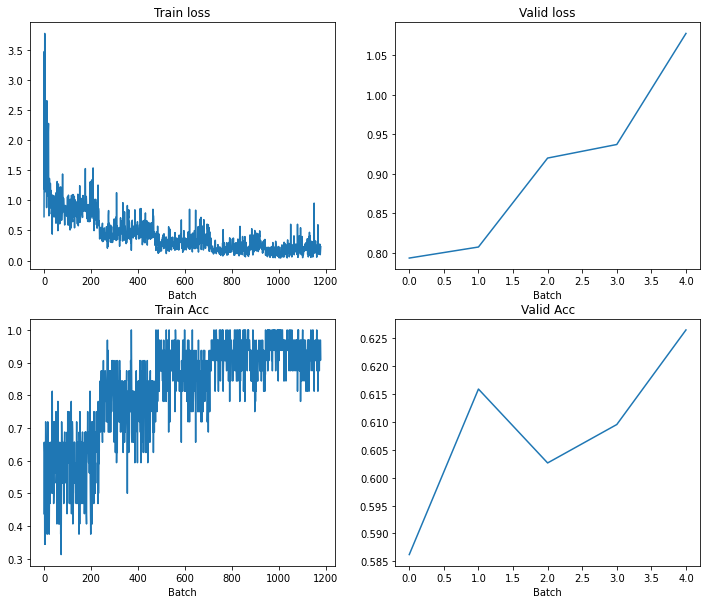

In [ ]:
print(round(model_pipe.test(), 2))
draw(history)

–ú–æ–¥–µ–ª—å —è–≤–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∞–µ—Ç—Å—è, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–∏ –æ—Ç–ª–∏—á–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö –Ω–∞ —Ç—Ä–µ–π–Ω–µ —É –Ω–µ–µ  –Ω–µ—Ç —É–ª—É—á—à–µ–Ω–∏–π –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏. –ù–∞ —Ç–µ—Å—Ç–µ –æ–Ω–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ö—É–∂–µ, —á–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞.

–£–≤–µ–ª–∏—á—É —Ä–∞–∑–º–µ—Ä —Å–∫—Ä—ã—Ç–æ–≥–æ —Å–ª–æ—è –¥–æ 768.

In [ ]:
freeze_type = 'all'
model = QuestAnsweringDistilBERT(bert, config, freeze_type, n_layers=1,
                                 hidden_dim=768, dim=768)
model_pipe = Model_Pipe(train_dataset, valid_dataset, dev_dataset,
                        model, hyperparams, freeze_type,
                        'all_frozen_1_head_hid_768_distilbert')
history = model_pipe.run_train()

EPOCH 0 STEP 50 : train_loss: 0.981272 train_acc: 0.500000
EPOCH 0 STEP 100 : train_loss: 1.439878 train_acc: 0.593750
EPOCH 0 STEP 150 : train_loss: 0.962488 train_acc: 0.562500
EPOCH 0 STEP 200 : train_loss: 0.958604 train_acc: 0.468750
EPOCH 0 : valid_acc: 0.641910
EPOCH 1 STEP 250 : train_loss: 0.395958 train_acc: 0.812500
EPOCH 1 STEP 300 : train_loss: 0.435004 train_acc: 0.812500
EPOCH 1 STEP 350 : train_loss: 0.556021 train_acc: 0.750000
EPOCH 1 STEP 400 : train_loss: 0.527333 train_acc: 0.718750
EPOCH 1 STEP 450 : train_loss: 0.453423 train_acc: 0.718750
EPOCH 1 : valid_acc: 0.594164
EPOCH 2 STEP 500 : train_loss: 0.241298 train_acc: 0.906250
EPOCH 2 STEP 550 : train_loss: 0.253658 train_acc: 0.843750
EPOCH 2 STEP 600 : train_loss: 0.222544 train_acc: 0.906250
EPOCH 2 STEP 650 : train_loss: 0.211816 train_acc: 0.937500
EPOCH 2 STEP 700 : train_loss: 0.285425 train_acc: 0.875000
EPOCH 2 : valid_acc: 0.631830
EPOCH 3 STEP 750 : train_loss: 0.172936 train_acc: 0.968750
EPOCH 3 STE

0.6


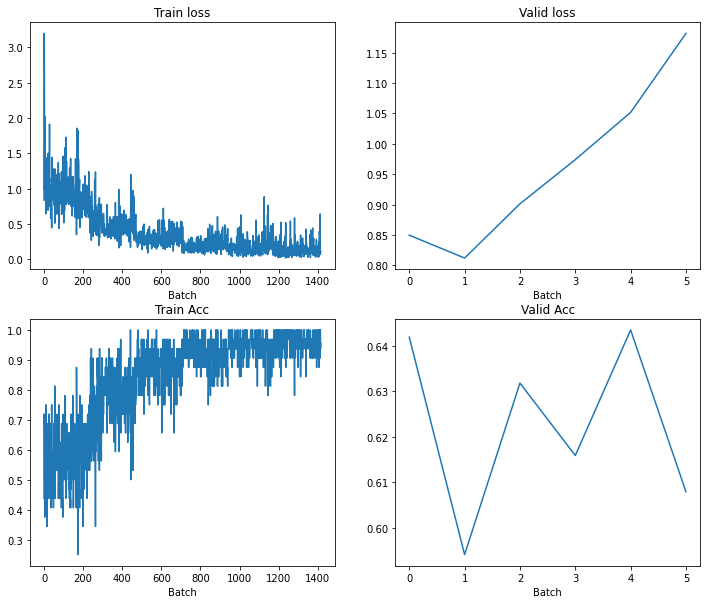

In [ ]:
print(round(model_pipe.test(), 2))
draw(history)

–≠—Ç–æ –Ω–µ –ø—Ä–∏–Ω–µ—Å–ª–æ –¥–∏–≤–∏–¥–µ–Ω–¥–æ–≤, —Ç–∞–∫ –∫–∞–∫ —É –º–æ–¥–µ–ª–∏ —Ç–∞–∫–∏–µ –∂–µ –ø—Ä–æ–±–ª–µ–º—ã, –æ–Ω–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ç–∞–∫–æ–π –∂–µ –ø–ª–æ—Ö–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –Ω–æ –±–æ–ª–µ–µ —Ç—è–∂–µ–ª–∞—è. –ù–µ –±—É–¥–µ–º —Ç—Ä–æ–≥–∞—Ç—å —ç—Ç—É –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—é.

–¢–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä—é 2 –≥–æ–ª–æ–≤—ã —Å–æ —Å–∫—Ä—ã—Ç—ã–º–∏ —Å–ª–æ—è–º–∏ –≤ 384.

In [ ]:
freeze_type = 'all'
model = QuestAnsweringDistilBERT(bert, config, freeze_type, n_layers=2,
                                 hidden_dim=384, dim=768)
model_pipe = Model_Pipe(train_dataset, valid_dataset, dev_dataset,
                        model, hyperparams, freeze_type,
                        'all_frozen_2_heads_hid_384_distilbert')
history = model_pipe.run_train()

EPOCH 0 STEP 50 : train_loss: 1.097728 train_acc: 0.656250
EPOCH 0 STEP 100 : train_loss: 0.756838 train_acc: 0.593750
EPOCH 0 STEP 150 : train_loss: 0.957619 train_acc: 0.625000
EPOCH 0 STEP 200 : train_loss: 1.666946 train_acc: 0.562500
EPOCH 0 : valid_acc: 0.540053
EPOCH 1 STEP 250 : train_loss: 0.609427 train_acc: 0.625000
EPOCH 1 STEP 300 : train_loss: 0.595713 train_acc: 0.656250
EPOCH 1 STEP 350 : train_loss: 0.525122 train_acc: 0.750000
EPOCH 1 STEP 400 : train_loss: 0.527835 train_acc: 0.687500
EPOCH 1 STEP 450 : train_loss: 0.735043 train_acc: 0.562500
EPOCH 1 : valid_acc: 0.590451
EPOCH 2 STEP 500 : train_loss: 0.400389 train_acc: 0.781250
EPOCH 2 STEP 550 : train_loss: 0.387237 train_acc: 0.875000
EPOCH 2 STEP 600 : train_loss: 0.518060 train_acc: 0.718750
EPOCH 2 STEP 650 : train_loss: 0.523069 train_acc: 0.718750
EPOCH 2 STEP 700 : train_loss: 0.388670 train_acc: 0.843750
EPOCH 2 : valid_acc: 0.604775
EPOCH 3 STEP 750 : train_loss: 0.165939 train_acc: 0.937500
EPOCH 3 STE

0.52


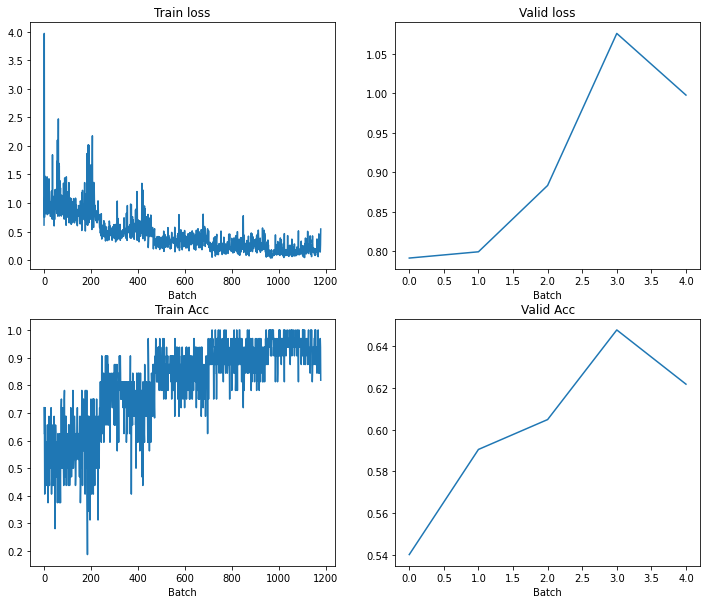

In [ ]:
print(round(model_pipe.test(), 2))
draw(history)

–°–∏—Ç—É–∞—Ü–∏—è —Ç–∞–∫–∞—è –∂–µ, –∫–∞–∫ —É –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —Å–µ—Ç–æ–∫, –Ω–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ —Ç–µ—Å—Ç–µ –µ—â–µ —Ö—É–∂–µ. –ü–æ—á—Ç–∏ –∫–∞–∫ —Å–ª—É—á–∞–π–Ω—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä. –Ø–≤–Ω–æ 2 –≥–æ–ª–æ–≤—ã —Ç–æ–ª—å–∫–æ –≤—Å–µ —É—Å–ª–æ–∂–Ω–∏–ª–∏. –í–µ—Ä–Ω–µ–º—Å—è –∫ 1 –≥–æ–ª–æ–≤–µ.

–°–µ–π—á–∞—Å —è —Ä–∞–∑–º–æ—Ä–æ–∂—É –≤—Å–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–æ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤.

In [ ]:
freeze_type = 'emb'
model = QuestAnsweringDistilBERT(bert, config, freeze_type, n_layers=1,
                                 hidden_dim=384, dim=768)
model_pipe = Model_Pipe(train_dataset, valid_dataset, dev_dataset,
                        model, hyperparams, freeze_type,
                        'emb_frozen_1_head_hid_384_distilbert')
history = model_pipe.run_train()

EPOCH 0 STEP 50 : train_loss: 1.108683 train_acc: 0.468750
EPOCH 0 STEP 100 : train_loss: 1.085799 train_acc: 0.625000
EPOCH 0 STEP 150 : train_loss: 1.225793 train_acc: 0.687500
EPOCH 0 STEP 200 : train_loss: 0.955040 train_acc: 0.468750
EPOCH 0 : valid_acc: 0.611671
EPOCH 1 STEP 250 : train_loss: 0.522683 train_acc: 0.687500
EPOCH 1 STEP 300 : train_loss: 0.642390 train_acc: 0.687500
EPOCH 1 STEP 350 : train_loss: 0.303550 train_acc: 0.875000
EPOCH 1 STEP 400 : train_loss: 0.411218 train_acc: 0.781250
EPOCH 1 STEP 450 : train_loss: 0.453421 train_acc: 0.781250
EPOCH 1 : valid_acc: 0.605305
EPOCH 2 STEP 500 : train_loss: 0.294248 train_acc: 0.906250
EPOCH 2 STEP 550 : train_loss: 0.352501 train_acc: 0.812500
EPOCH 2 STEP 600 : train_loss: 0.153269 train_acc: 0.937500
EPOCH 2 STEP 650 : train_loss: 0.313300 train_acc: 0.843750
EPOCH 2 STEP 700 : train_loss: 0.416330 train_acc: 0.843750
EPOCH 2 : valid_acc: 0.621220
EPOCH 3 STEP 750 : train_loss: 0.133080 train_acc: 0.968750
EPOCH 3 STE

0.62


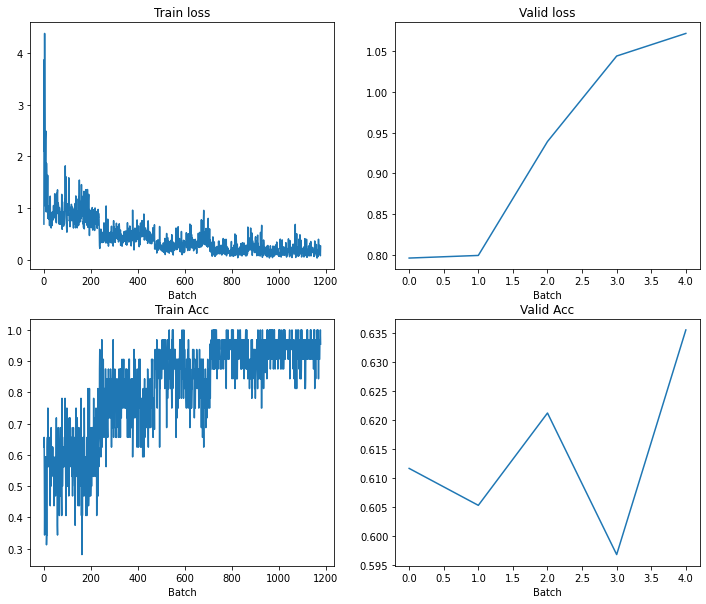

In [ ]:
print(round(model_pipe.test(), 2))
draw(history)

–ú–æ–¥–µ–ª—å —É–ª—É—á—à–∏–ª–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ö–æ—Ç—è –±—ã –¥–æ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–≥–æ, –Ω–æ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –≤—Å–µ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –ø—Ä–æ–±–ª–µ–º—ã. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –≤—ã–±–µ—Ä—É —Ç–∞–∫—É—é –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—é –∫–∞–∫ –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç.

–î–∞–ª–µ–µ –±—É–¥—É —Ä–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞—Ç—å bert-transformer —á–∞—Å—Ç—å —Ç–æ–ª—å–∫–æ —Å 3 —ç–ø–æ—Ö–∏ –æ–±—É—á–µ–Ω–∏—è.

In [32]:
hyperparams = {'lr': 1e-4, 'batch_size': 16, 'epochs': 10}
freeze_type = 'part'
model = QuestAnsweringDistilBERT(bert, config, freeze_type, n_layers=1,
                                 hidden_dim=384, dim=768)
model_pipe = Model_Pipe(train_dataset, valid_dataset, dev_dataset,
                        model, hyperparams, freeze_type,
                        'part_frozen_1_head_hid_384_distilbert')
history = model_pipe.run_train()

EPOCH 0 STEP 50 : train_loss: 0.574130 train_acc: 0.687500
EPOCH 0 STEP 100 : train_loss: 1.073448 train_acc: 0.437500
EPOCH 0 STEP 150 : train_loss: 0.688657 train_acc: 0.687500
EPOCH 0 STEP 200 : train_loss: 0.462834 train_acc: 0.750000
EPOCH 0 STEP 250 : train_loss: 0.705688 train_acc: 0.562500
EPOCH 0 STEP 300 : train_loss: 0.911721 train_acc: 0.437500
EPOCH 0 STEP 350 : train_loss: 0.578358 train_acc: 0.687500
EPOCH 0 STEP 400 : train_loss: 0.683591 train_acc: 0.687500
EPOCH 0 STEP 450 : train_loss: 0.587295 train_acc: 0.687500
EPOCH 0 : valid_acc: 0.653581
EPOCH 1 STEP 500 : train_loss: 0.425247 train_acc: 0.750000
EPOCH 1 STEP 550 : train_loss: 0.543844 train_acc: 0.687500
EPOCH 1 STEP 600 : train_loss: 0.246859 train_acc: 0.937500
EPOCH 1 STEP 650 : train_loss: 0.401209 train_acc: 0.875000
EPOCH 1 STEP 700 : train_loss: 0.751246 train_acc: 0.625000
EPOCH 1 STEP 750 : train_loss: 0.566308 train_acc: 0.812500
EPOCH 1 STEP 800 : train_loss: 0.462571 train_acc: 0.750000
EPOCH 1 STE

In [33]:
from google.colab import files
files.download('/content/part_frozen_1_head_hid_384_distilbert_best-val-model.pt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.67


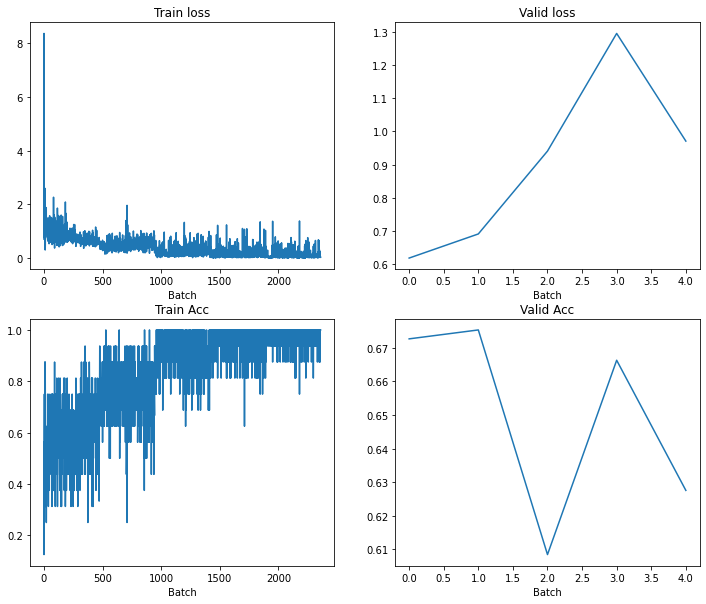

In [ ]:
print(round(model_pipe.test(), 2))
draw(history)

–¢–∞–∫–∞—è –º–æ–¥–µ–ª—å —É–∂–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞—Ä–∞–≤–Ω–µ —Å fasttext, —Ö–æ—Ç—è —É –Ω–µ–µ –≤—Å–µ —Ç–∞–∫–∏–µ –∂–µ –ø—Ä–æ–±–ª–µ–º—ã. –ù–æ —ç—Ç–∞ –º–æ–¥–µ–ª—å –ª—É—á—à–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –≤ —ç—Ç–æ–º –ø—É–Ω–∫—Ç–µ –Ω–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç. –í—ã–±–µ—Ä—É –µ–µ. 

–¢–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É—é —Ä–∞–∑–º–æ—Ä–æ–∑–∏—Ç—å –≤–æ–æ–±—â–µ –≤—Å–µ —Å–ª–æ–∏.

In [ ]:
hyperparams = {'lr': 1e-4, 'batch_size': 16, 'epochs': 10}
freeze_type = 'none'
model = QuestAnsweringDistilBERT(bert, config, freeze_type, n_layers=1,
                                 hidden_dim=384, dim=768)
model_pipe = Model_Pipe(train_dataset, valid_dataset, dev_dataset,
                        model, hyperparams, freeze_type,
                        'none_frozen_1_head_hid_384_distilbert')
history = model_pipe.run_train()

EPOCH 0 STEP 50 : train_loss: 0.860260 train_acc: 0.562500
EPOCH 0 STEP 100 : train_loss: 0.824882 train_acc: 0.750000
EPOCH 0 STEP 150 : train_loss: 0.734411 train_acc: 0.750000
EPOCH 0 STEP 200 : train_loss: 1.129322 train_acc: 0.375000
EPOCH 0 STEP 250 : train_loss: 0.633680 train_acc: 0.687500
EPOCH 0 STEP 300 : train_loss: 0.943243 train_acc: 0.375000
EPOCH 0 STEP 350 : train_loss: 0.662918 train_acc: 0.687500
EPOCH 0 STEP 400 : train_loss: 0.746828 train_acc: 0.562500
EPOCH 0 STEP 450 : train_loss: 0.525621 train_acc: 0.812500
EPOCH 0 : valid_acc: 0.653581
EPOCH 1 STEP 500 : train_loss: 0.553997 train_acc: 0.750000
EPOCH 1 STEP 550 : train_loss: 0.401165 train_acc: 0.750000
EPOCH 1 STEP 600 : train_loss: 0.811650 train_acc: 0.687500
EPOCH 1 STEP 650 : train_loss: 0.652895 train_acc: 0.687500
EPOCH 1 STEP 700 : train_loss: 0.449267 train_acc: 0.812500
EPOCH 1 STEP 750 : train_loss: 0.270606 train_acc: 0.937500
EPOCH 1 STEP 800 : train_loss: 0.377012 train_acc: 0.812500
EPOCH 1 STE

0.66


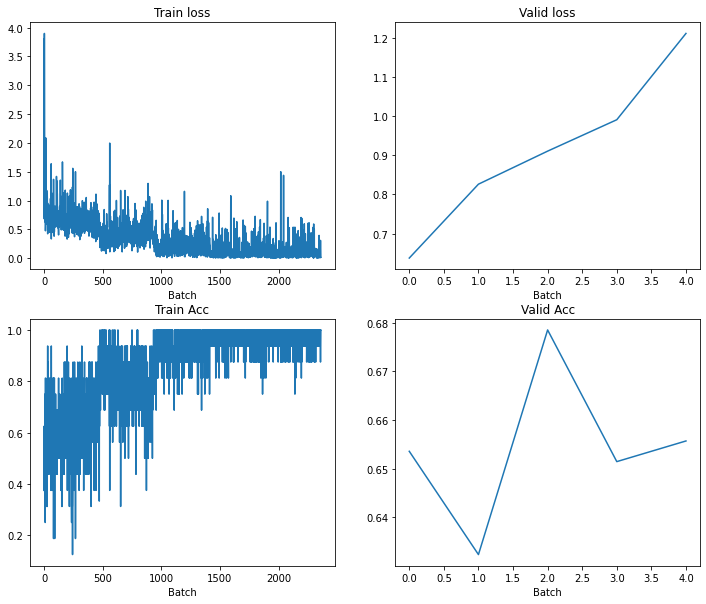

In [ ]:
print(round(model_pipe.test(), 2))
draw(history)

–≠—Ç–æ –Ω–µ —É–ª—É—á—à–∏–ª–æ –ø—Ä–µ–¥—ã–¥—É—â–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å, —Ö–æ—Ç—è –º–æ–¥–µ–ª—å –Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç—Å—Ç–∞–µ—Ç –æ—Ç –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –≤ —ç—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏, –∞ —Ç–∞–∫–∂–µ –æ—Ç –º–æ–¥–µ–ª–µ–π –Ω–∞ fasttext. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –æ–Ω–∞ —Å–ª–æ–∂–Ω–µ–µ, —á–µ–º –ø—Ä–µ–¥—ã–¥—É—â–∞—è –∏ –≤ –Ω–µ–π –±–æ–ª—å—à–µ –æ–±—É—á–∞–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –ø–æ—ç—Ç–æ–º—É –Ω–µ –±—É–¥—É –µ–µ –≤—ã–±–∏—Ä–∞—Ç—å.

–°–µ–π—á–∞—Å –ø–æ–ø—Ä–æ–±—É—é –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Roberta.

In [ ]:
from transformers import RobertaTokenizer, RobertaModel, RobertaConfig
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
bert = RobertaModel.from_pretrained('roberta-base')

In [ ]:
train_dataset = CustomDataset(train_df, tokenizer)
valid_dataset = CustomDataset(val_df, tokenizer)
dev_dataset = CustomDataset(dev_df, tokenizer)

–û–±—É—á—É –Ω–∞ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö –¥–ª—è DistilBert.

In [ ]:
hyperparams = {'lr': 1e-4, 'batch_size': 8, 'epochs': 10}
freeze_type = 'part'
model = QuestAnsweringDistilBERT(bert, config, freeze_type, n_layers=1,
                                 hidden_dim=384, dim=768)
model_pipe = Model_Pipe(train_dataset, valid_dataset, dev_dataset,
                        model, hyperparams, freeze_type,
                        'part_frozen_1_head_hid_384_roberta')
history = model_pipe.run_train()

EPOCH 0 STEP 50 : train_loss: 0.660467 train_acc: 0.625000
EPOCH 0 STEP 100 : train_loss: 1.655990 train_acc: 0.250000
EPOCH 0 STEP 150 : train_loss: 0.689651 train_acc: 0.625000
EPOCH 0 STEP 200 : train_loss: 0.670205 train_acc: 0.625000
EPOCH 0 STEP 250 : train_loss: 0.549037 train_acc: 0.875000
EPOCH 0 STEP 300 : train_loss: 0.696107 train_acc: 0.625000
EPOCH 0 STEP 350 : train_loss: 0.709085 train_acc: 0.625000
EPOCH 0 STEP 400 : train_loss: 0.900913 train_acc: 0.625000
EPOCH 0 STEP 450 : train_loss: 0.990798 train_acc: 0.625000
EPOCH 0 STEP 500 : train_loss: 0.786503 train_acc: 0.500000
EPOCH 0 STEP 550 : train_loss: 0.543452 train_acc: 0.750000
EPOCH 0 STEP 600 : train_loss: 0.726578 train_acc: 0.375000
EPOCH 0 STEP 650 : train_loss: 0.536103 train_acc: 0.750000
EPOCH 0 STEP 700 : train_loss: 0.918845 train_acc: 0.500000
EPOCH 0 STEP 750 : train_loss: 0.907917 train_acc: 0.625000
EPOCH 0 STEP 800 : train_loss: 1.544864 train_acc: 0.375000
EPOCH 0 STEP 850 : train_loss: 0.721433 t

0.62


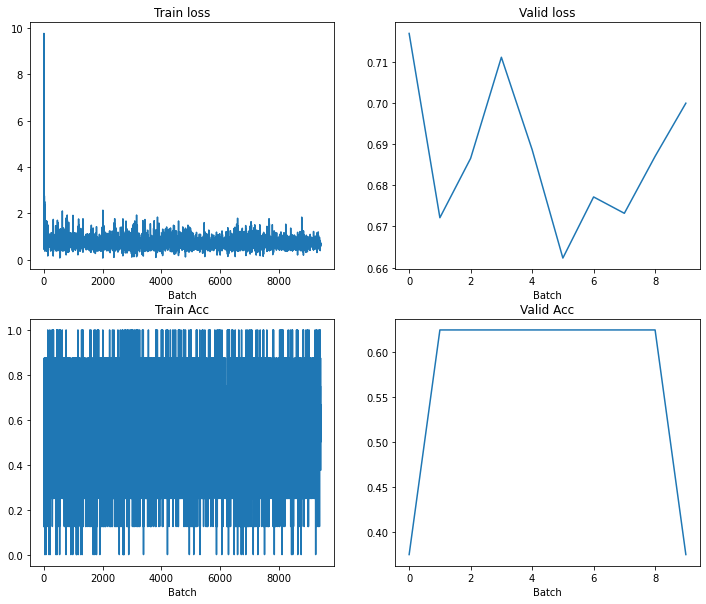

In [ ]:
print(round(model_pipe.test(), 2))
draw(history)

–Ø –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª –º–∞–ª–µ–Ω—å–∫–∏–π —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞, —Ç–∞–∫ –∫–∞–∫ –±–æ–ª—å—à–∏–π —Ä–∞–∑–º–µ—Ä –ø—Ä–∏–≤–æ–¥–∏–ª –∫ –ø–µ—Ä–µ–ø–æ–ª–Ω–µ–Ω–∏—é –ø–∞–º—è—Ç–∏. –≠—Ç–æ –º–æ–≥–ª–æ –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—É—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä–æ–µ, –≤–æ–∑–º–æ–∂–Ω–æ, –ø—Ä–æ—è–≤–ª—è–µ—Ç—Å—è –≤ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ–º accuracy –Ω–∞ —Ç—Ä–µ–π–Ω–µ –∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—é —É–º–µ–Ω—å—à–µ–Ω–∏—è –≤ –ª–æ—Å—Å–µ. –ù–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –ª–æ—Å—Å –ø–∞–¥–∞–ª, –Ω–æ –Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ —ç—Ç–æ –Ω–µ —Å–∫–∞–∑—ã–≤–∞–ª–æ—Å—å –≤ –ª—É—á—à—É—é —Å—Ç–æ—Ä–æ–Ω—É. –†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –∫–∞–∫ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–π, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–∏—á–µ–º—É –Ω–µ –Ω–∞—É—á–∏–ª–∞—Å—å. –ó–¥–µ—Å—å Roberta —è–≤–Ω–æ –ø—Ä–æ–∏–≥—Ä–∞–ª–∞ DistilBert.